### Import Libraries and Read Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/Users/rafaelzieganpalg/Projects/VOIS DA/Doctor_Visit_Dataset.csv')
df.head()


,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


### 1. Number of Duplicates in the Dataset

In [2]:
# Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicates: {duplicates_count}")


Number of duplicates: 0


### 2. Total Number of People Based on Illness Count

In [3]:
# Count the occurrences of each illness count
illness_count = df['illness'].value_counts()
print(illness_count)


illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64


### 3. Gender-wise Illness Count

In [4]:
# Group by 'gender' and sum up illness count
gender_illness_count = df.groupby('gender')['illness'].sum()
print(gender_illness_count)


gender
female    4353
male      3079
Name: illness, dtype: int64


### 4. Analyze Maximum, Minimum, and Median Income

In [5]:
# Find the max, min, and median income
max_income = df['income'].max()
min_income = df['income'].min()
median_income = df['income'].median()

print(f"Maximum Income: {max_income}")
print(f"Minimum Income: {min_income}")
print(f"Median Income: {median_income}")


Maximum Income: 1.5
Minimum Income: 0.0
Median Income: 0.55


### 5. Days of Reduced Activity due to Illness by Gender

In [6]:
# Sum up the 'reduced' column by 'gender'
reduced_activity_gender = df.groupby('gender')['reduced'].sum()
print(reduced_activity_gender)


gender
female    2636
male      1837
Name: reduced, dtype: int64


### 6. Visualize Missing Values with Heatmap

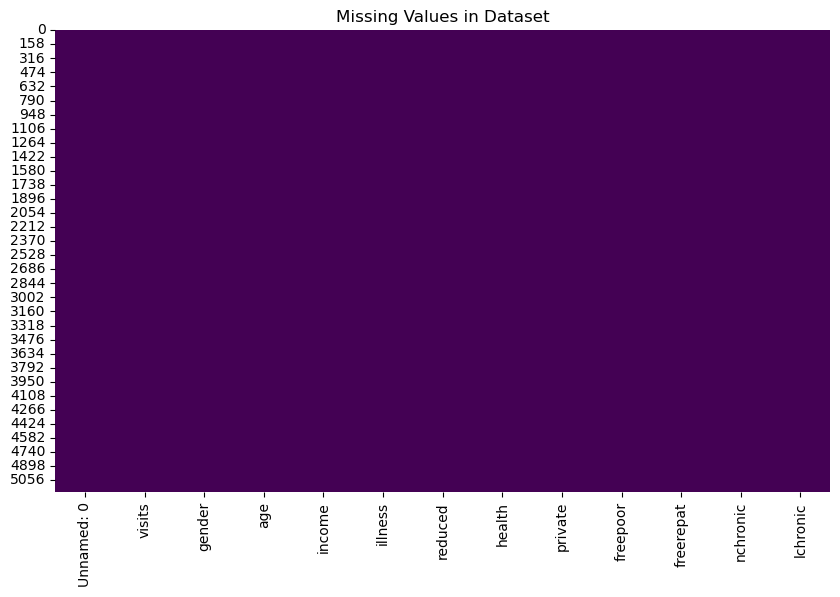

In [7]:
# Plot heatmap to visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()


### 7. Correlation Between Variables

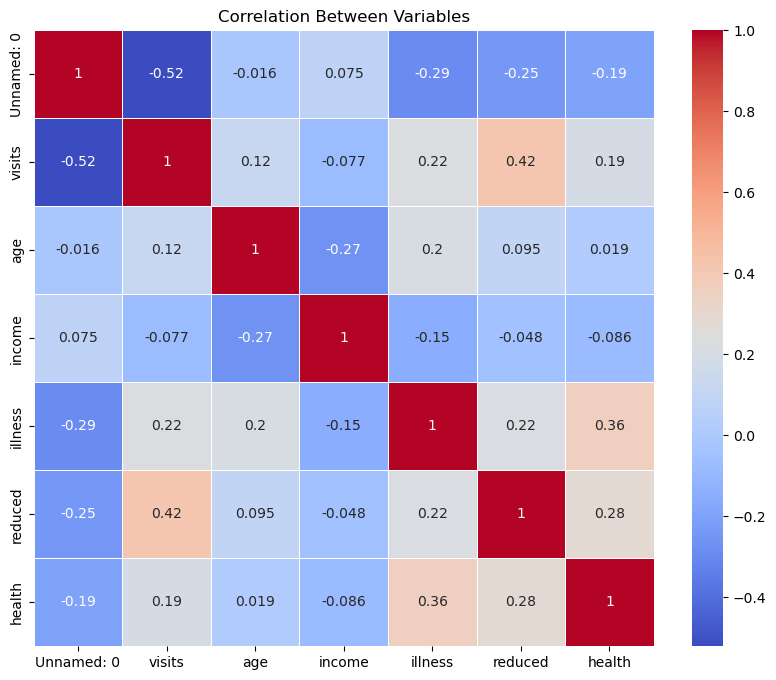

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=[float, int]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Variables')
plt.show()


### 8. Analyze How Income Affects Hospital Visits

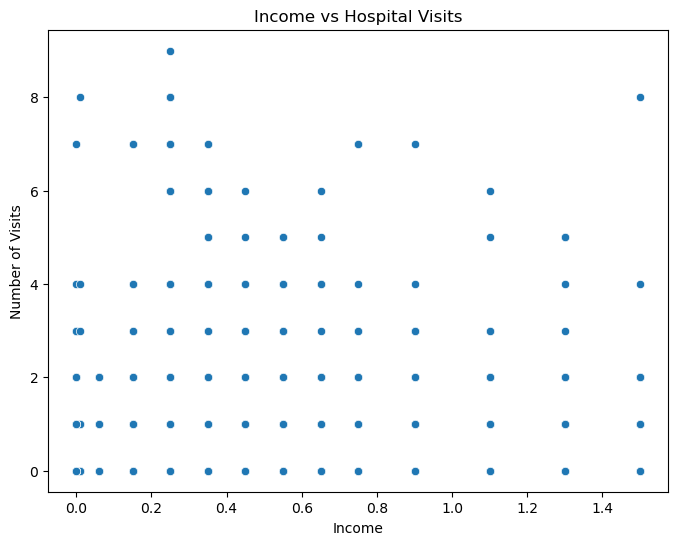

In [10]:
# Scatter plot to visualize the relationship between income and hospital visits
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='visits', data=df)
plt.title('Income vs Hospital Visits')
plt.xlabel('Income')
plt.ylabel('Number of Visits')
plt.show()


### 9. Count and Visualize Illness by Gender

gender
female    2023
male      1613
dtype: int64


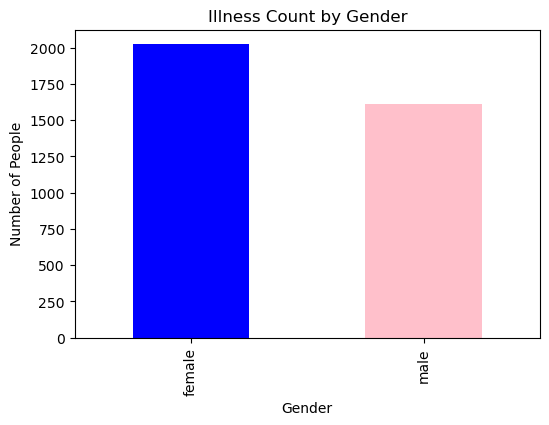

In [11]:
# Count illness by gender
illness_by_gender = df[df['illness'] > 0].groupby('gender').size()
print(illness_by_gender)

# Visualize using bar plot
plt.figure(figsize=(6, 4))
illness_by_gender.plot(kind='bar', color=['blue', 'pink'])
plt.title('Illness Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of People')
plt.show()


### 10. Percentage of People with Govt and Private Health Insurance

In [12]:
# Calculate percentage of people with government health insurance due to low income or old age
gov_insurance_low_income = (df[df['freepoor'] == 'yes'].shape[0] / df.shape[0]) * 100
gov_insurance_old_age = (df[df['freerepat'] == 'yes'].shape[0] / df.shape[0]) * 100
private_insurance = (df[df['private'] == 'yes'].shape[0] / df.shape[0]) * 100

print(f"Percentage with Govt. insurance (low income): {gov_insurance_low_income}%")
print(f"Percentage with Govt. insurance (old age): {gov_insurance_old_age}%")
print(f"Percentage with Private insurance: {private_insurance}%")


Percentage with Govt. insurance (low income): 4.277456647398844%
Percentage with Govt. insurance (old age): 21.021194605009633%
Percentage with Private insurance: 44.27745664739884%


### 11. Reduced Activity Days Due to Illness Based on Gender (Bar Chart)

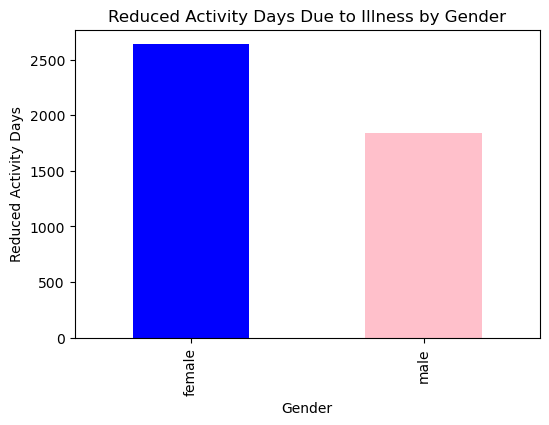

In [13]:
# Bar plot for reduced days by gender
plt.figure(figsize=(6, 4))
df.groupby('gender')['reduced'].sum().plot(kind='bar', color=['blue', 'pink'])
plt.title('Reduced Activity Days Due to Illness by Gender')
plt.xlabel('Gender')
plt.ylabel('Reduced Activity Days')
plt.show()


### 12. Relation Between Health Status and Activity Reduction (Heatmap)

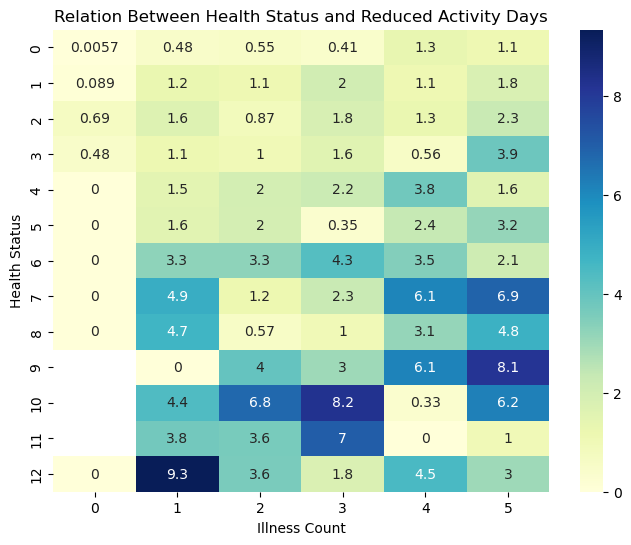

In [14]:
# Create pivot table for heatmap analysis
health_activity_relation = df.pivot_table(values='reduced', index='health', columns='illness', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(health_activity_relation, annot=True, cmap='YlGnBu')
plt.title('Relation Between Health Status and Reduced Activity Days')
plt.xlabel('Illness Count')
plt.ylabel('Health Status')
plt.show()
